In [ ]:
# !pip install deep_autoviml --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from deep_autoviml import deep_autoviml as deepauto
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train_s3TEQDk.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include = ['int64','float64']).columns
print(cat_vars,num_vars)

Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object') Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')


In [8]:
idtouse = df['ID']
tousedata = df.drop(['ID'],axis = 1)
cat_vars = tousedata.select_dtypes(include=['object']).columns
num_vars = tousedata.select_dtypes(include = ['int64','float64']).columns

In [9]:
# Unique values and Value Counts Function

def getuniquevals(df):
    for i in df.columns:
        print(f' Column : {i} has : {df[i].unique()} unique values')
        print('='*100)
        
def getvaluecounts(df):
    for i in df.columns:
        print(f' Column : {i} has : {df[i].value_counts()} value counts')
        print('='*100)

In [10]:
getuniquevals(tousedata)

 Column : Gender has : ['Female' 'Male'] unique values
 Column : Age has : [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23] unique values
 Column : Region_Code has : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] unique values
 Column : Occupation has : ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] unique values
 Column : Channel_Code has : ['X3' 'X1' 'X2' 'X4'] unique values
 Column : Vintage has : [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 11

In [11]:
df['Credit_Product'] = df['Credit_Product'].fillna('DK')
df['Credit_Product'].unique()

array(['No', 'DK', 'Yes'], dtype=object)

In [12]:
tousedata['Credit_Product'] = tousedata['Credit_Product'].astype('str')
tousedata['Is_Active'] = tousedata['Is_Active'].astype('str')
tousedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [13]:
# Encoding categorical features using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy = ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
tousedata['Gender'] = le.fit_transform(tousedata['Gender'])
tousedata['Channel_Code'] = le.fit_transform(tousedata['Channel_Code'])
tousedata['Occupation'] = le.fit_transform(tousedata['Occupation'])
tousedata['Credit_Product'] = le.fit_transform(tousedata['Credit_Product'])
tousedata['Is_Active'] = le.fit_transform(tousedata['Is_Active'])

In [14]:
# Applying Mean Enconding for Feature Region Code


a = df['Region_Code'].value_counts(normalize = True).to_dict()
mean_mapper = {}
for key,value in a.items():
    mean_mapper[key] = value/df.shape[0]
    
tousedata['Region_Code'] = tousedata['Region_Code'].map(mean_mapper)
tousedata.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,5.951232e-07,1,2,43,0,1045696,0,0
1,0,30,2.124186e-07,2,0,32,0,581988,0,0
2,0,56,5.951232e-07,3,2,26,0,1484315,1,0
3,1,34,1.278553e-07,2,0,19,0,470454,0,0
4,0,30,9.653735e-08,2,0,33,0,886787,0,0


 Distribution plot for feature : Age is ↓


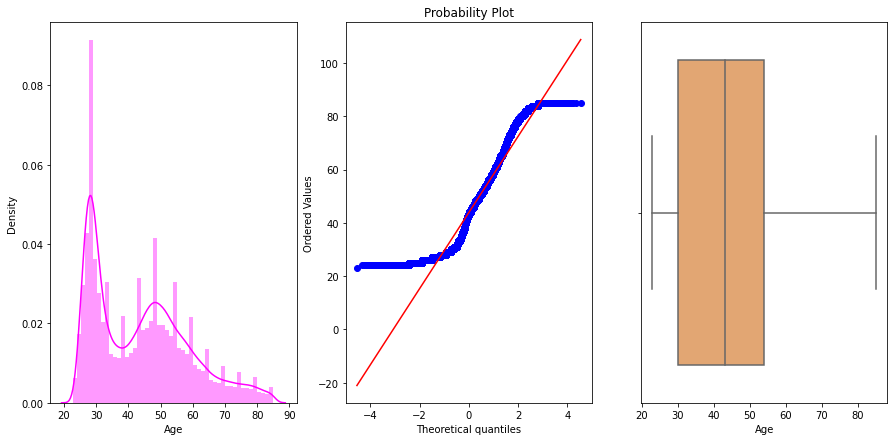

 Distribution plot for feature : Vintage is ↓


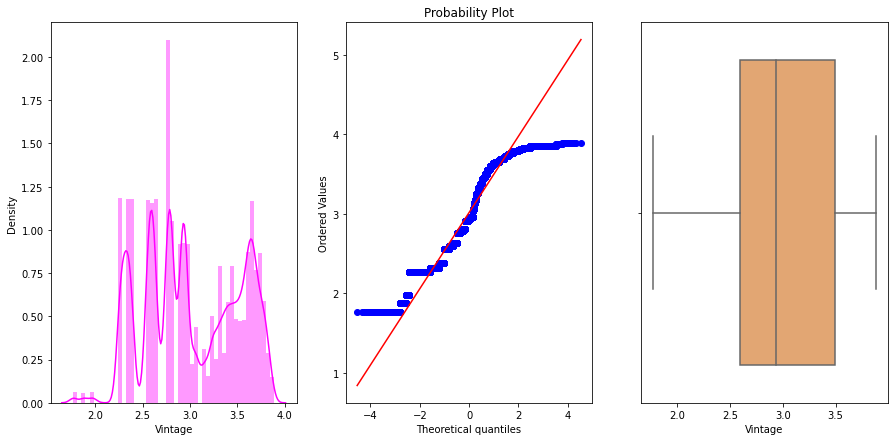

 Distribution plot for feature : Avg_Account_Balance is ↓


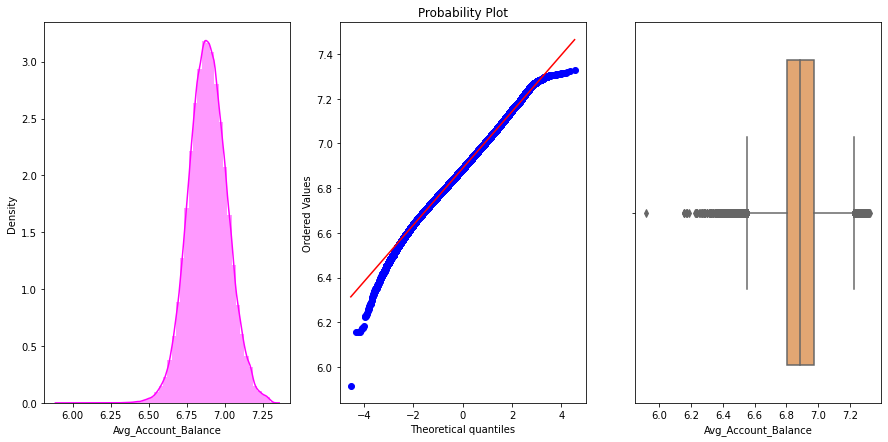

In [15]:
import scipy.stats as stats

# Viusalising Distributions

def drawplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    sn.distplot(tousedata[col],color='magenta')
    
    
    plt.subplot(1,3,2)
    stats.probplot(tousedata[col],dist='norm',plot=plt)
    
    
    plt.subplot(1,3,3)
    sn.boxplot(tousedata[col],color = 'sandybrown')
    
    
    plt.show()
    
    

tousedata['Avg_Account_Balance'],params = stats.boxcox(tousedata['Avg_Account_Balance'])
tousedata['Vintage'],params = stats.boxcox(np.abs(tousedata['Vintage']))
for i in num_vars[:-1]:
    print(f' Distribution plot for feature : {i} is ↓')
    drawplots(i)
    print('='*100)

In [16]:
# Removing outliers using IQR (Inter Quantile Range)

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a


tousedata['Avg_Account_Balance'] = quantile(tousedata,'Avg_Account_Balance')
tousedata.isnull().sum()


Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product            0
Avg_Account_Balance    2668
Is_Active                 0
Is_Lead                   0
dtype: int64

In [17]:
tousedata = tousedata.dropna()

In [18]:
# Quantile and Log Transformations

from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(n_bins = 8,encode = 'ordinal',strategy = 'quantile')
tousedata['vintage_quantile'] = dis.fit_transform(tousedata['Vintage'].values.reshape(-1,1)).astype('int')
tousedata['Age_qunatile'] = dis.fit_transform(tousedata['Age'].values.reshape(-1,1)).astype('int')
tousedata['vintage_logs'] = np.log(tousedata['Vintage'])

In [19]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,StandardScaler,RobustScaler

In [20]:
test = tousedata['Is_Lead']
train = tousedata.drop(['Is_Lead'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.4)
print(X_train.shape,X_test.shape)

(145834, 12) (97223, 12)


In [21]:
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

## Tuning the LGBM Model

In [72]:
params = {
    
      'LGBMClassifier':{
          'model':LGBMClassifier(),
          'params':{
              'class_weight':[None,'balanced'],
            'boosting_type':['gbdt','goss','dart'],
            'num_leaves':list(range(30,100)),
            'learning_rate':list(np.logspace(np.log(0.005),np.log(0.2),
                                             base = np.exp(1),num = 1000)),
                  
            'subsample_for_bin':list(range(20000,300000,20000)),
            'min_child_samples':list(range(20,500,5)),
            'reg_alpha':list(np.linspace(0,1)),
            'reg_lambda':list(np.linspace(0,1)),
            'colsample_bytree':list(np.linspace(0.6,1,10))
          }
      }

}

In [73]:
scores = []
for model,mp in params.items():
  clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],n_iter = 10,
                           cv = 5,scoring = 'accuracy',n_jobs = -1,return_train_score = False)
  clf.fit(X_train,y_train)
  scores.append({
      'model_name':model,
      'best_score':clf.best_score_,
      'best_estimator':clf.best_estimator_,
  })

In [74]:
scores

[{'best_estimator': LGBMClassifier(boosting_type='goss', colsample_bytree=0.6,
                 learning_rate=0.054922173584349414, min_child_samples=50,
                 num_leaves=95, reg_alpha=0.4897959183673469,
                 reg_lambda=0.02040816326530612, subsample_for_bin=40000),
  'best_score': 0.8608486275365366,
  'model_name': 'LGBMClassifier'}]

In [75]:
lgbm = LGBMClassifier(boosting_type='goss', colsample_bytree=0.6,
                 learning_rate=0.054922173584349414, min_child_samples=50,
                 num_leaves=95, reg_alpha=0.4897959183673469,
                 reg_lambda=0.02040816326530612, subsample_for_bin=40000)
lgbm.fit(X_train_scaled,y_train)
print(metrics.roc_auc_score(y_test,lgbm.predict_proba(X_test)[:,1]))

0.7364518768974074


## Loding the Testing Data and Trying to check performance on it

In [77]:
test = pd.read_csv('/content/drive/MyDrive/test_mSzZ8RL.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [78]:
test['Credit_Product'] = test['Credit_Product'].fillna('DK')
test['Credit_Product'].unique()

array(['Yes', 'DK', 'No'], dtype=object)

In [79]:
test['Credit_Product'] = test['Credit_Product'].astype('str')
test['Is_Active'] = test['Is_Active'].astype('str')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy = ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
test['Gender'] = le.fit_transform(test['Gender'])
test['Channel_Code'] = le.fit_transform(test['Channel_Code'])
test['Occupation'] = le.fit_transform(test['Occupation'])
test['Credit_Product'] = le.fit_transform(test['Credit_Product'])
test['Is_Active'] = le.fit_transform(test['Is_Active'])

In [81]:
# Applying Mean Enconding for Feature Region Code


a = test['Region_Code'].value_counts(normalize = True).to_dict()
mean_mapper = {}
for key,value in a.items():
    mean_mapper[key] = value/df.shape[0]
    
test['Region_Code'] = test['Region_Code'].map(mean_mapper)
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,0.00,1,0,25,2,742366,0
1,CCMEWNKY,1,43,0.00,1,1,49,0,925537,0
2,VK3KGA9M,1,31,0.00,2,0,14,1,215949,0
3,TT8RPZVC,1,29,0.00,1,0,33,1,868070,0
4,SHQZEYTZ,0,29,0.00,1,0,19,1,657087,0


In [82]:
test['Avg_Account_Balance'],params = stats.boxcox(test['Avg_Account_Balance'])
test['Vintage'],params = stats.boxcox(np.abs(test['Vintage']))

In [83]:
# Removing outliers using IQR 

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.nan
        
        elif i<lower_limit:
            i = np.nan
            
        else:
            i = i
            
        a.append(i)
        
    return a


test['Avg_Account_Balance'] = quantile(test,'Avg_Account_Balance')
test.isnull().sum()


ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product            0
Avg_Account_Balance    1167
Is_Active                 0
dtype: int64

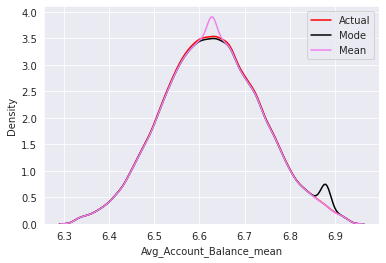

In [84]:
mean =  test['Avg_Account_Balance'].mean()
test['Avg_Account_Balance_mean'] = test['Avg_Account_Balance'].fillna(mean)

mode = test['Avg_Account_Balance'].mode()
test['Avg_Account_Balance_mode'] = test['Avg_Account_Balance'].fillna(mode[0])


sn.distplot(test['Avg_Account_Balance'],hist = False,color = 'red',label = 'Actual')
sn.distplot(test['Avg_Account_Balance_mode'],hist = False,color = 'black',label = 'Mode')
sn.distplot(test['Avg_Account_Balance_mean'],hist = False,color = 'violet',label = 'Mean')
plt.legend()
plt.show()

In [85]:
mode = test['Avg_Account_Balance'].mode()
test['Avg_Account_Balance'] = test['Avg_Account_Balance'].fillna(mean)
test.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Avg_Account_Balance_mean    0
Avg_Account_Balance_mode    0
dtype: int64

In [86]:
test = test.drop(['Avg_Account_Balance_mode','Avg_Account_Balance_mean'],axis = 1)
test.shape

(105312, 10)

In [87]:
testid = test['ID']

In [88]:
from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(n_bins = 8,encode = 'ordinal',strategy = 'quantile')

In [89]:
test['vintage_quantile'] = dis.fit_transform(test['Vintage'].values.reshape(-1,1)).astype('int')
test['Age_qunatile'] = dis.fit_transform(test['Age'].values.reshape(-1,1)).astype('int')
test['vintage_logs'] = np.log(test['Vintage'])

In [90]:
test = test.drop(['ID'],axis = 1)
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,vintage_quantile,Age_qunatile,vintage_logs
0,1,29,0.00,1,0,2.76,2,6.59,0,2,1,1.02
1,1,43,0.00,1,1,3.24,0,6.63,0,4,4,1.18
2,1,31,0.00,2,0,2.33,1,6.34,0,0,2,0.84
3,1,29,0.00,1,0,2.96,1,6.62,0,4,1,1.09
4,0,29,0.00,1,0,2.56,1,6.57,0,1,1,0.94


In [91]:
test_scaled = minmax.transform(test)

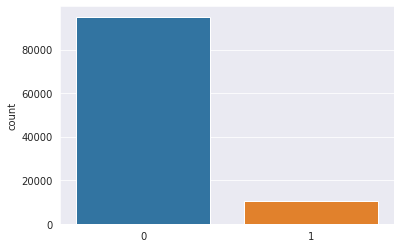

In [92]:
lgbm_prediction = lgbm.predict_proba(test)
compare_lgbm = []
for i in lgbm_prediction[:,1]:
  if i>0.5:
    compare_lgbm.append(1)
  else:
    compare_lgbm.append(0)

sn.countplot(compare)

In [93]:
print(dict(Counter(compare_lgbm)))

{1: 92790, 0: 12522}


## Training My Custom Model

In [34]:
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import regularizers
from functools import partial

## Training Notes

### Suggested Count

Value Counts were  : {0: inbetween 84500->85k, 1: inbetween 20,000->20,500 max 21,000}




## Model Training 1 :


Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh')
])


This model gave me an ROC AUC of 0.84769822857193


Value Counts were  : {0: 80083, 1: 25229}

---------------------------------------------

## Model Training 2 : 

mymodel = Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh')
])

This model gave me an ROC AUC of 0.73456

Value Counts were  : {0: 85613, 1: 19699}

---------------------------------------------

## Model Training 3 : 

mymodel = Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh')
])


Value Counts were :  {0: 95050, 1: 10262}

Tried to add LGBM but failed! badly!

---------------------------------------------

## Model Training 4 : 

RegDense = partial(Dense,kernel_initializer = 'he_normal',
                    kernel_regularizer = regularizers.l2(0.01))

mymodel = Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh')
])


Value Counts : {0: 70482, 1: 34830}


---------------------------------------------

## Model Training 5 (Last Custom Attempt): 


mymodel = Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      
])

Value Counts : 

---------------------------------------------

## Model Training 6 (DeepVl Edition):



# ***` Custom Models`***





In [131]:
# Creating my custom model which i will be passing as a parameter to deepauto!

RegDense = partial(Dense,kernel_initializer = 'he_normal',
                    kernel_regularizer = regularizers.l2(0.01))

mymodel = Sequential([
                      BatchNormalization(),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(150),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(100),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      RegDense(300),
                      BatchNormalization(),
                      Dropout(0.5),
                      Activation('tanh'),
                      
])

In [132]:
# Custom train test split

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.33,random_state=42)
print(train.shape,test.shape)

(164635, 11) (81090, 11)


In [133]:
# We can change the parameters accordingly!

keras_model_type = "auto"
keras_options = {"early_stopping":True}
model_options = {'tuner':"storm","max_trails":50}
target = 'Is_Lead'

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    early_stopping : True
Using following model_options given as input:
    tuner : storm

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 164635 rows, 10 cols
Data Set columns info:
* ID: 0 nulls, 164635 unique vals, most common: {'8ZLUZX4P': 1, 'VSJRUANN': 1}
* Ge

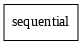

Model plot saved in file: deep_autoviml_test_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
After preprocessing using keras layers, features dimensions is now 128
    original datasize = 164635, initial batchsize = 16
    Early stopping : True
    recommended steps per epoch = 411
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Onecycle steps = 514500
    loss fn = <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x7fabc8d9e510>
    num predicts = 2, output_activation = sigmoid
    steps_per_epoch = 411, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10

Splitting trai

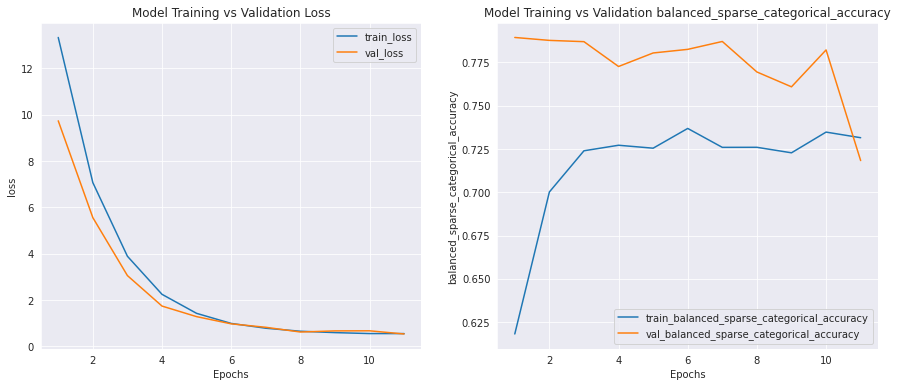

Time taken to train model (in mins) = 1
    Stopped epoch = 11
Held out data actuals shape: (16464,)
Printing 10 samples from labels data:
tf.Tensor([0 0 0 1 0 1 1 1 1 0], shape=(10,), dtype=int64)

Held out predictions shape:(16464,)
    Sample predictions: [0 1 0 0 0 1 1 1 1 0]

###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 79.7%
    Balanced Accuracy = 78.7%
    Precision         = 53.9%
    Average Precision = 73.0%
    Recall            = 76.7%
    F1 Score          = 63.3%
    ROC AUC           = 84.1%
#####################################################

Training full train dataset. This will take time...
    best learning rate = 0.0021015385
    set learning rate using best model: 0.0021015385
    max epochs for training = 11

Saving model in test/auto now...this will take time...


     deep model saved in test/auto directory
71803

Saving vocab dictionary using pickle in test/cat_vocab_dict.pickle...will take time...
    Saved pickle file in test/cat_vocab_dict.pickle

Saving variable definitions file using pickle in test/var_df.pickle...will take time...
    Saved pickle file in test/var_df.pickle

Deep_Auto_ViML completed. Total time taken = 2 (in mins)


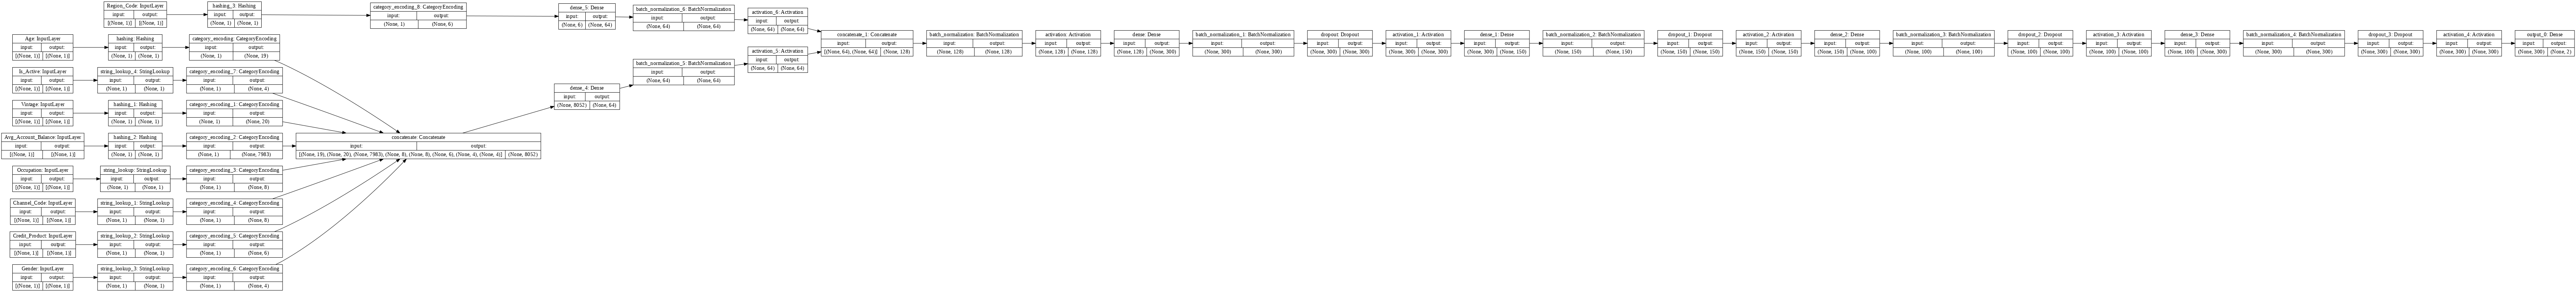

Model plot saved in file: deep_autoviml_test_auto_model_after.png


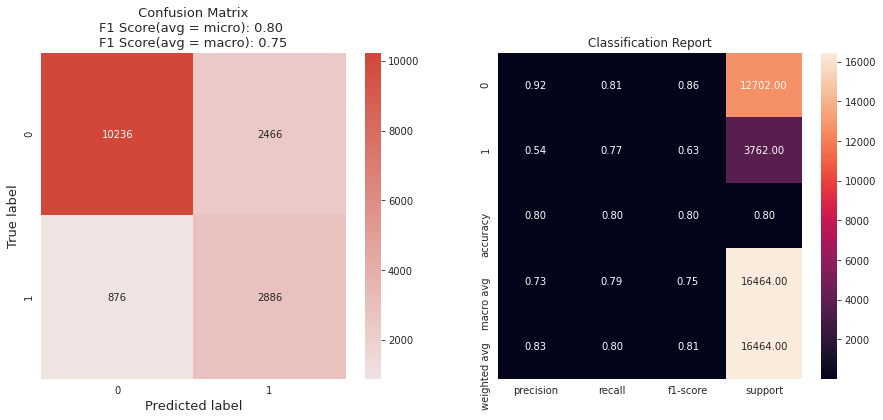

In [134]:
# Setting the parameter of "use_my_model" as my custom trained model

model,cat_vocab_dict = deepauto.fit(train,target,keras_model_type=keras_model_type,
                                    project_name = "test",
                                    keras_options = keras_options,
                                    model_options = model_options,
                                    use_my_model = mymodel,
                                    save_model_flag=True,
                                    verbose = 2)

In [135]:
predictions = deepauto.predict(model,project_name = 'test',
                               test_dataset = test,
                               keras_model_type = keras_model_type,
                               cat_vocab_dict = cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fabca313cd0> model provided as input...
    loaded model.
Loaded test data size: 81090
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    test data loaded successfully.
    modeltype =  Classification , test data size =  81090 , batch_size =  16
    number of steps needed to predict: 5069
    Sample predictions before inverse_transform: [1 0 0 0 0]
    Sample predictions after transform: [1 0 0 0 0]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [136]:
from sklearn import metrics
print(metrics.roc_auc_score(test[target].values,predictions[1]))

0.7836382427183077


**Testing my Custom Deep Learning Model on Test Dataset**

In [137]:
testnew = pd.read_csv('/content/drive/MyDrive/test_mSzZ8RL.csv')
predictions_new = deepauto.predict(model,project_name = 'test',
                               test_dataset = testnew,
                               keras_model_type = keras_model_type,
                               cat_vocab_dict = cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fabca313cd0> model provided as input...
    loaded model.
Loaded test data size: 105312
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    test data loaded successfully.
    modeltype =  Classification , test data size =  105312 , batch_size =  16
    number of steps needed to predict: 6582
    Sample predictions before inverse_transform: [0 1 0 0 0]
    Sample predictions after transform: [0 1 0 0 0]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 1


# Previous Model Trainings ~ Training 5

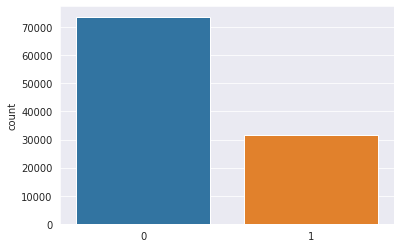

In [138]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [139]:
print(dict(Counter(compare)))

{0: 73718, 1: 31594}


# Previous Model Trainings ~ Training 4

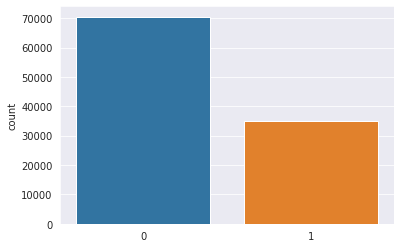

In [120]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [121]:
print(dict(Counter(compare)))

{0: 70482, 1: 34830}


# Previous Model Trainings ~ Training 3

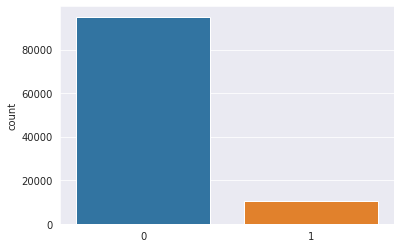

In [70]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [71]:
print(dict(Counter(compare)))

{0: 95050, 1: 10262}


**Trying to combine lgbm with custom model to check for performance improvance**

In [111]:
lgbm_prediction_value = lgbm_prediction[:,1]
ans_list_value = ans_list
final_lgbm_net = (lgbm_prediction_value+ans_list_value)/2
# final_lgbm_net = []
# for i,j in zip(lgbm_prediction_value,ans_list_value):
#   final_lgbm_net.append((i+j)/)
# print(len(lgbm_prediction_value),len(ans_list_value))

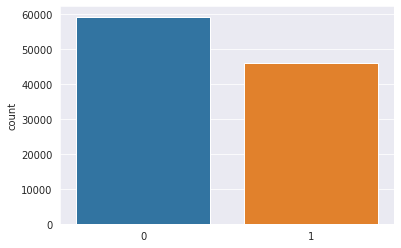

In [112]:
compare = []
for i in final_lgbm_net:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

# Previous Model Trainings ~ Training 2

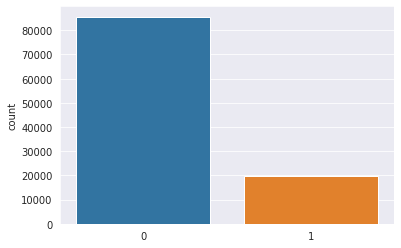

In [59]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [60]:
print(dict(Counter(compare)))

{0: 85613, 1: 19699}


In [61]:
submissions = pd.read_csv('/content/drive/MyDrive/sample_submission_eyYijxG.csv')
submissions['Is_Lead'] = ans_list
submissions.head()

,ID,Is_Lead
0,VBENBARO,0.06
1,CCMEWNKY,0.41
2,VK3KGA9M,0.21
3,TT8RPZVC,0.05
4,SHQZEYTZ,0.06


In [62]:
submissions.to_csv('CUSTOMMODEL2sub.csv')

# Previous Model Trainings ~ Training 1

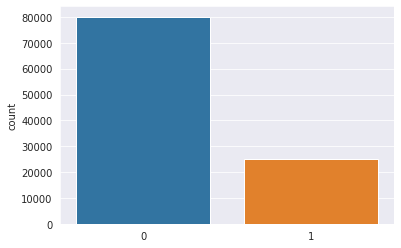

In [44]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [45]:
print(dict(Counter(compare)))

{0: 80083, 1: 25229}


In [46]:
submissions = pd.read_csv('/content/drive/MyDrive/sample_submission_eyYijxG.csv')
submissions.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [47]:
submissions['Is_Lead'] = ans_list
submissions.head()

,ID,Is_Lead
0,VBENBARO,0.14
1,CCMEWNKY,0.56
2,VK3KGA9M,0.09
3,TT8RPZVC,0.02
4,SHQZEYTZ,0.02


In [48]:
submissions.to_csv('CUSTOMDEEPTRAINEDMODELsub.csv')

# Deep VI Model (Approach 6)

In [202]:
train,test = train_test_split(df,test_size=0.33,random_state=42)
print(train.shape,test.shape)

(164635, 11) (81090, 11)


In [203]:
keras_model_type = "auto"
keras_options = {"early_stopping":True}
model_options = {'tuner':"storm","max_trails":18}
target = 'Is_Lead'

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    early_stopping : True
Using following model_options given as input:
    tuner : storm

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 164635 rows, 10 cols
Data Set columns info:
* ID: 0 nulls, 164635 unique vals, most common: {'8ZLUZX4P': 1, 'VSJRUANN': 1}
* Ge

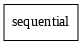

Model plot saved in file: deep_autoviml_test1_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
After preprocessing using keras layers, features dimensions is now 128
    original datasize = 164635, initial batchsize = 16
    Early stopping : True
    recommended steps per epoch = 411
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Onecycle steps = 514500
    loss fn = <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x7fabd85eba90>
    num predicts = 2, output_activation = sigmoid
    steps_per_epoch = 411, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10

Splitting tra

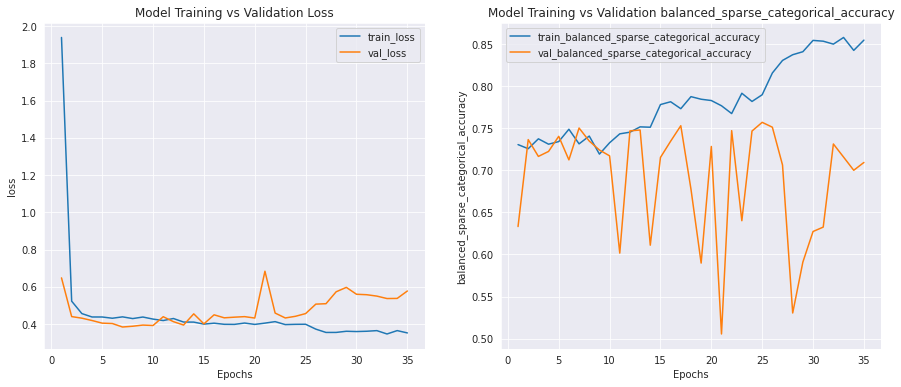

Time taken to train model (in mins) = 6
    Stopped epoch = 35
Held out data actuals shape: (16464,)
Printing 10 samples from labels data:
tf.Tensor([0 0 0 1 0 1 1 1 1 0], shape=(10,), dtype=int64)

Held out predictions shape:(16464,)
    Sample predictions: [0 0 0 0 0 1 0 0 1 0]

###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 84.2%
    Balanced Accuracy = 75.0%
    Precision         = 68.1%
    Average Precision = 78.1%
    Recall            = 58.0%
    F1 Score          = 62.7%
    ROC AUC           = 84.5%
#####################################################

Training full train dataset. This will take time...
    best learning rate = 0.0030213692
    set learning rate using best model: 0.0030213692
    max epochs for training = 35

Saving model in test1/auto now...this will take time...


     deep model saved in test1/auto directory
60642

Saving vocab dictionary using pickle in test1/cat_vocab_dict.pickle...will take time...
    Saved pickle file in test1/cat_vocab_dict.pickle

Saving variable definitions file using pickle in test1/var_df.pickle...will take time...
    Saved pickle file in test1/var_df.pickle

Deep_Auto_ViML completed. Total time taken = 8 (in mins)


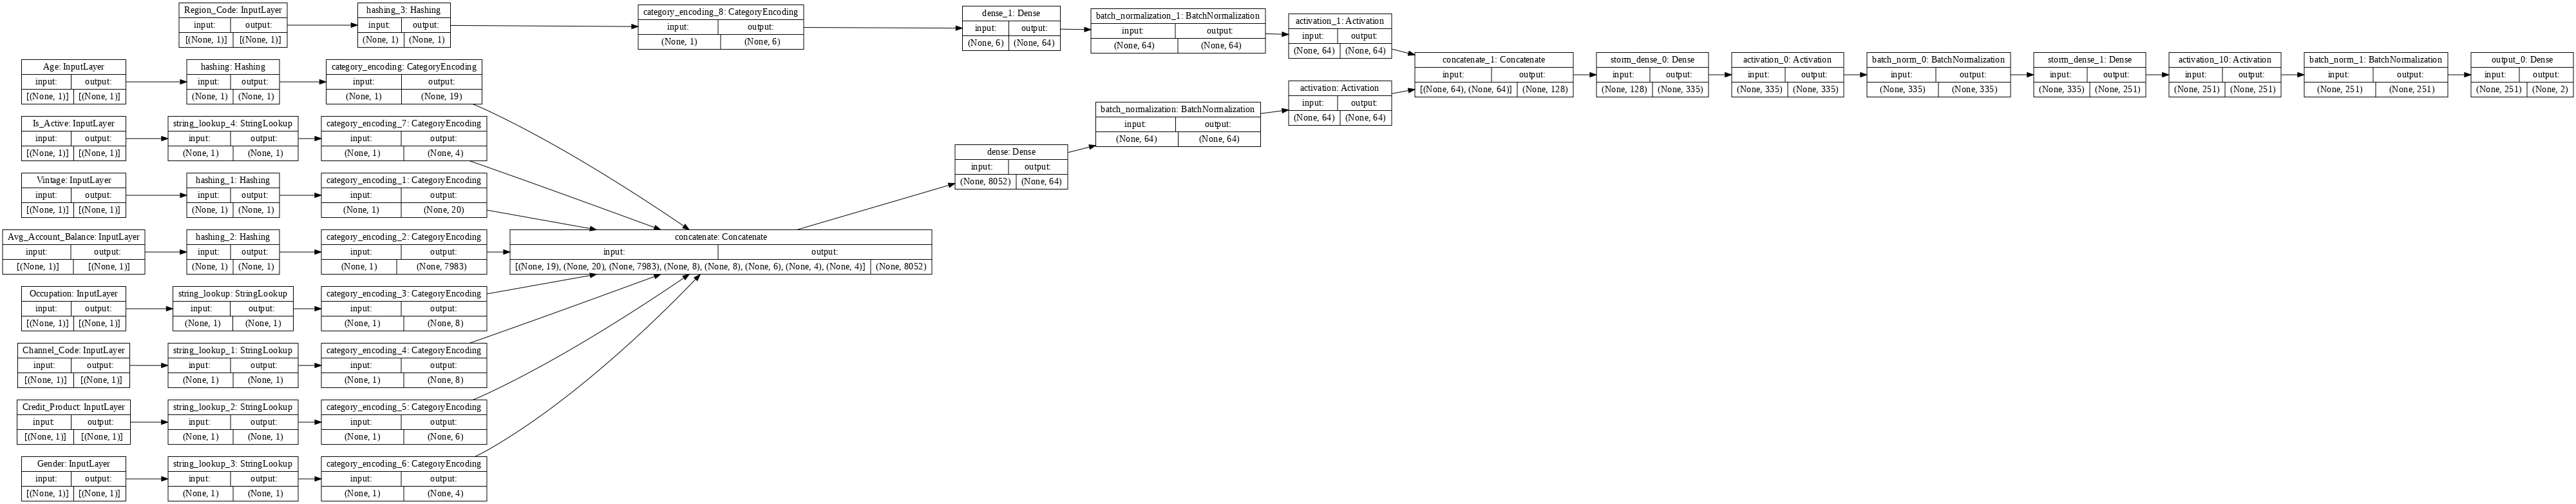

Model plot saved in file: deep_autoviml_test1_auto_model_after.png


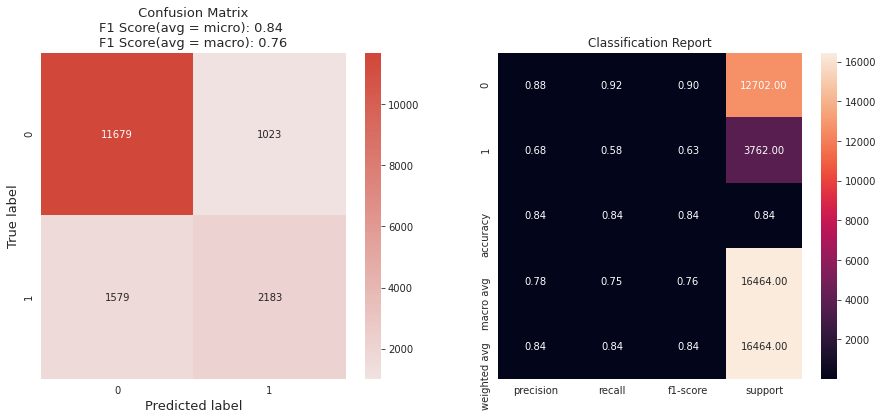

In [204]:
model,cat_vocab_dict = deepauto.fit(train,target,keras_model_type=keras_model_type,
                                    project_name = "test1",
                                    keras_options = keras_options,
                                    model_options = model_options,
                                    save_model_flag=True,
                                    verbose = 2)

In [197]:
predictions = deepauto.predict(model,project_name = 'test1',
                               test_dataset = test,
                               keras_model_type = keras_model_type,
                               cat_vocab_dict = cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fabb6f50f50> model provided as input...
    loaded model.
Loaded test data size: 81090
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    test data loaded successfully.
    modeltype =  Classification , test data size =  81090 , batch_size =  16
    number of steps needed to predict: 5069
    Sample predictions before inverse_transform: [0 0 0 0 0]
    Sample predictions after transform: [0 0 0 0 0]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [198]:
print(metrics.roc_auc_score(test[target].values,predictions[1]))

0.7409389114992748


In [206]:
testnew = pd.read_csv('/content/drive/MyDrive/test_mSzZ8RL.csv')
predictions_new = deepauto.predict(model,project_name = 'test1',
                               test_dataset = testnew,
                               keras_model_type = keras_model_type,
                               cat_vocab_dict = cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fabec1f2d50> model provided as input...
    loaded model.
Loaded test data size: 105312
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    test data loaded successfully.
    modeltype =  Classification , test data size =  105312 , batch_size =  16
    number of steps needed to predict: 6582
    Sample predictions before inverse_transform: [0 0 0 0 0]
    Sample predictions after transform: [0 0 0 0 0]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


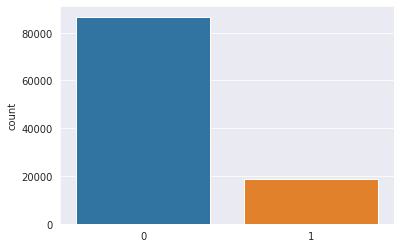

In [207]:
ans_list = [predictions_new[0][i][1] for i in range(len(predictions_new[0]))]
compare = []
for i in ans_list:
  if i>0.5:
    compare.append(1)
  else:
    compare.append(0)
  
sn.countplot(compare)

In [208]:
print(dict(Counter(compare)))

{0: 86678, 1: 18634}


In [209]:
submissions = pd.read_csv('/content/drive/MyDrive/sample_submission_eyYijxG.csv')
submissions.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [210]:
submissions['Is_Lead'] = ans_list
submissions.head()

,ID,Is_Lead
0,VBENBARO,0.03
1,CCMEWNKY,0.08
2,VK3KGA9M,0.07
3,TT8RPZVC,0.02
4,SHQZEYTZ,0.02


In [211]:
submissions.to_csv('CUSTOMMODELsub5must.csv')

**Custom Deep Learning Models gave just 85% of AUC ROC by performing all EDA and statistical transformations,now i have tried to using K FOLD,Fast AI,and Pytorch for Implementing the Dataset! **The Above Submissions gave me a Max ROCAUC of 85.6%,gonna go for fast Ai****

## FAST AI VERSION

In [2]:
# !git clone https://github.com/fastai/fastai
# !pip install -e "fastai[dev]"

Cloning into 'fastai'...


In [3]:
!pip install -e "fastai[dev]"

Obtaining file:///D:/MLAI/MLMAJOR/kaggle/Intern/hacka/Analytics%20Vidya/AVShacka/suggested%20submissions/The%20finals%21/fastai
  Using cached torchvision-0.9.1-cp37-cp37m-win_amd64.whl (852 kB)
  Using cached torch-1.8.1-cp37-cp37m-win_amd64.whl (190.5 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached configparser-5.0.2-py3-none-any.whl (19 kB)
  Using cached GitPython-3.1.17-py3-none-any.whl (166 kB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached websocket_client-1.0.1-py2.py3-none-any.whl (68 kB)
  Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
  Using cached smmap-4.0.0-py2.py3-none-any.whl (24 kB)
  Created wheel for neptune-client: filename=neptune_client-0.9.15-py2.py3-none-any.whl size=418301 sha256=f8e9d6db3937f6357ed50853de44ba03f3e7b8cdd6e1a1919570aba42b387648
  Stored in directory: c:\users\meet\appdata\local\pip\cache\wheels\77\9d\f7\eb0a0267e4b31f36153

You should consider upgrading via the 'c:\users\meet\anaconda3\envs\tensorflow_ennv\python.exe -m pip install --upgrade pip' command.


In [1]:
from sklearn.linear_model import Lasso, LinearRegression,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import numpy as np 
import pandas as pd 

import seaborn as sn
import matplotlib.pyplot as plt

# from sklearn.utils.testing import all_estimators
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier

In [3]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [4]:
# numvars and catvars

categorical_vars = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
conts = ['Age', 'Vintage', 'Avg_Account_Balance']

In [5]:
# outliers
train = train[train['Avg_Account_Balance']<=max(test.Avg_Account_Balance)].reset_index(drop=True)

In [6]:
def getplot(col):
    plt.figure(figsize = (16,9))
    sn.countplot(data = train,x = col,hue = 'Is_Lead')
    plt.tight_layout()
    plt.show()

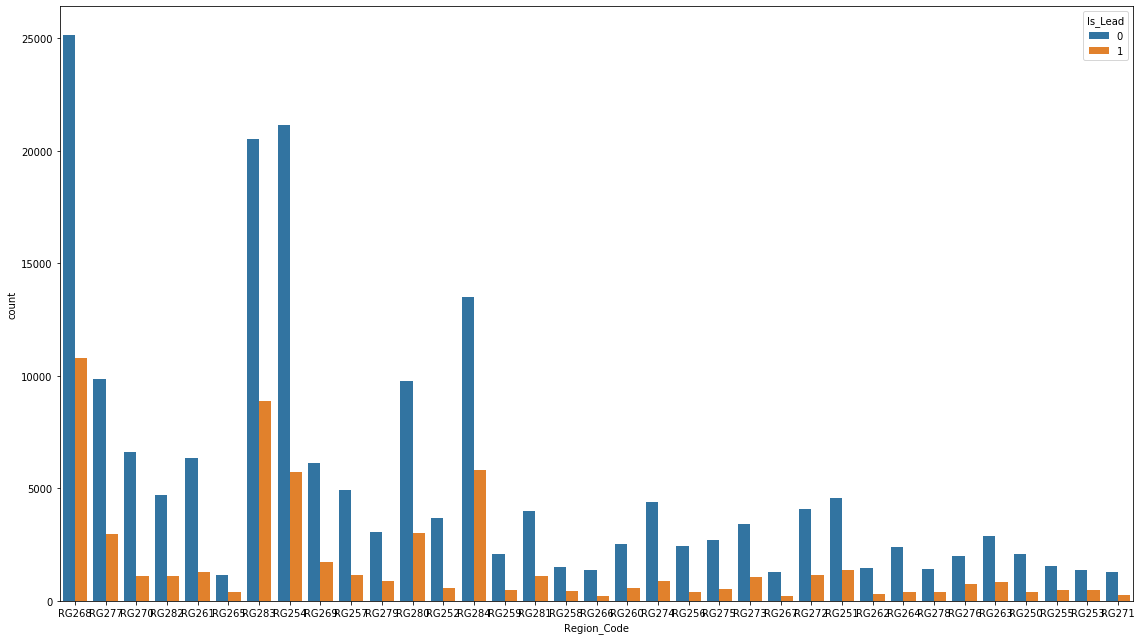

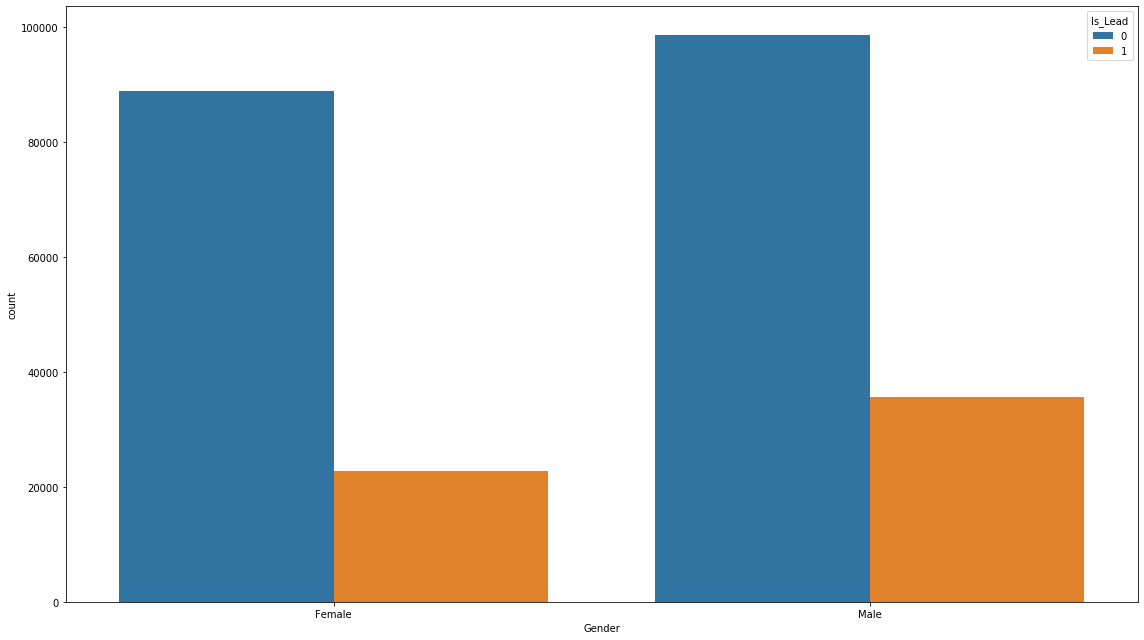

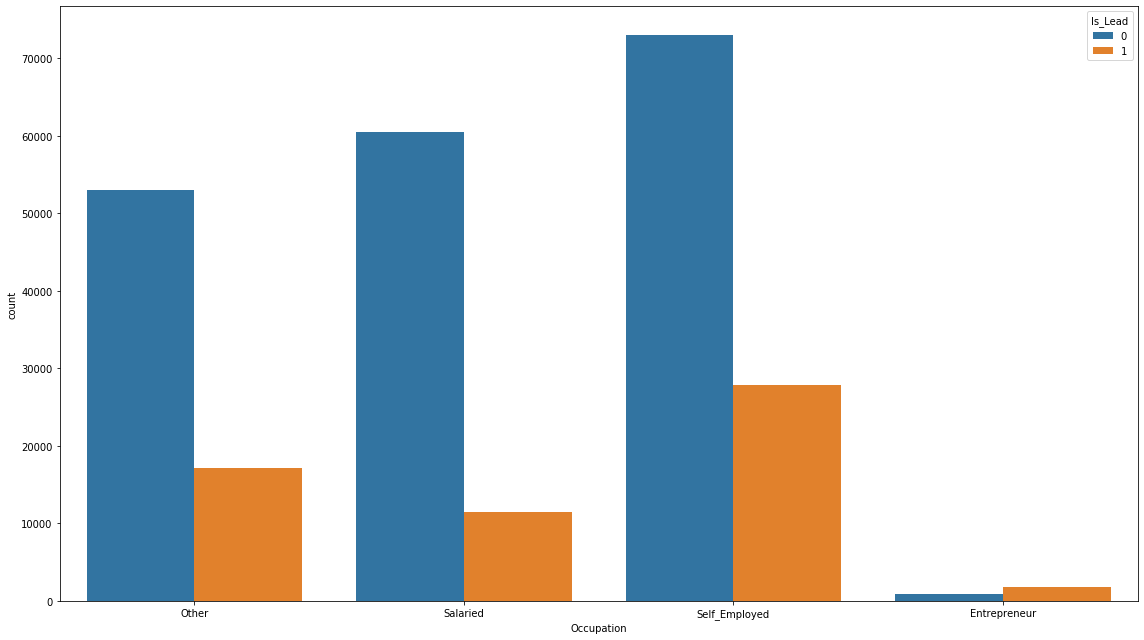

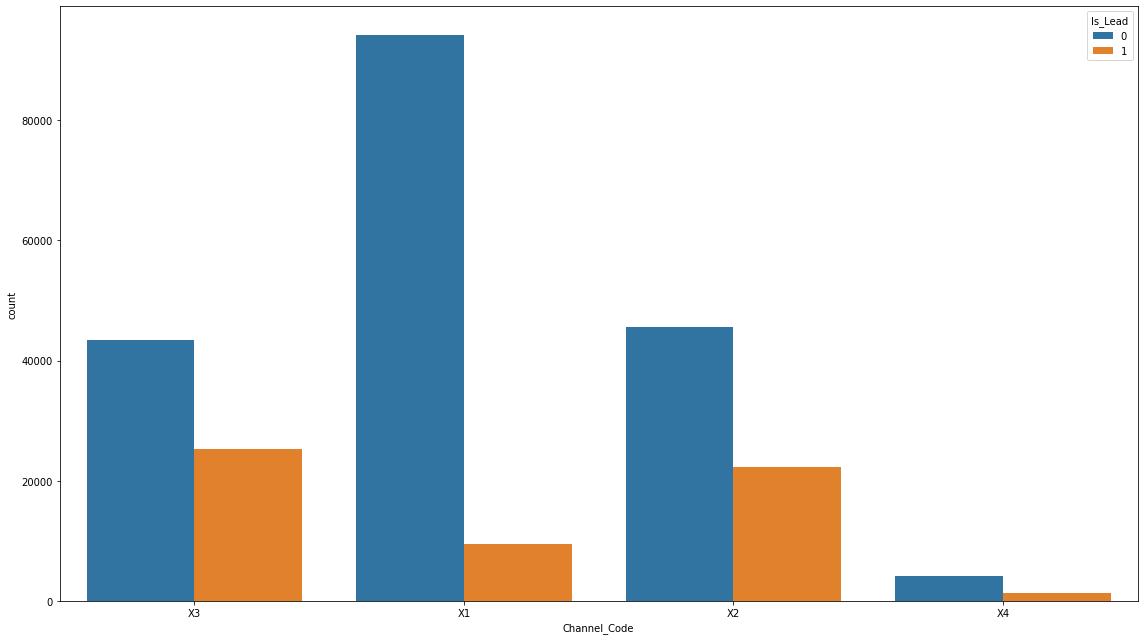

In [7]:
col_list = ['Region_Code','Gender','Occupation','Channel_Code']
for i in col_list:
    getplot(i)
    print("="*100)

## Missing Values

In [8]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
train.Credit_Product = train.Credit_Product.replace({'Yes':1, 'No':0})
test.Credit_Product = test.Credit_Product.replace({'Yes':1, 'No':0})

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:

le = LabelEncoder()
le.fit(train['Gender'])
train['Gender'] = le.transform(train['Gender'])
test['Gender'] = le.transform(test['Gender'])

In [12]:
from sklearn.preprocessing import LabelEncoder
ole = LabelEncoder()
ole.fit(train['Occupation'])
train['Occupation'] = ole.transform(train['Occupation'])
test['Occupation'] = ole.transform(test['Occupation'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Channel Code Label Encoding

le.fit(train['Channel_Code'])
train['Channel_Code'] = le.transform(train['Channel_Code'])
test['Channel_Code'] = le.transform(test['Channel_Code'])


# Active Feature Label Encoding


le.fit(train['Is_Active'])
train['Is_Active'] = le.transform(train['Is_Active'])
test['Is_Active'] = le.transform(test['Is_Active'])

# Region Feature Label Encoding

le.fit(train['Region_Code'])
train['Region_Code'] = le.transform(train['Region_Code'])
test['Region_Code'] = le.transform(test['Region_Code'])



## Quantile and Log Transformation

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
est.fit(train['Age'].values.reshape(-1,1))
train['Age_quantiles'] = est.transform(train['Age'].values.reshape(-1,1)).astype(int)
test['Age_quantiles'] = est.transform(test['Age'].values.reshape(-1,1)).astype(int)

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=22, encode='ordinal', strategy='quantile')
est.fit(train['Vintage'].values.reshape(-1,1))
train['Vintage_quantiles'] = est.transform(train['Vintage'].values.reshape(-1,1)).astype(int)
test['Vintage_quantiles'] = est.transform(test['Vintage'].values.reshape(-1,1)).astype(int)

In [16]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(train['Avg_Account_Balance'].values.reshape(-1,1))
train['Avg_Account_Balance_quantiles'] = est.transform(train['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)
test['Avg_Account_Balance_quantiles'] = est.transform(test['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)

In [17]:
train['Avg_Account_Balance_log'] = np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance_log'] = np.log(test['Avg_Account_Balance'])

train['Vintage_log'] = np.log(train['Vintage'])
test['Vintage_log'] = np.log(test['Vintage'])

In [18]:
selected_columns = ['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage_log', 'Credit_Product', 'Avg_Account_Balance_log', 'Is_Active']

Target_col = 'Is_Lead'
train = train.fillna(2)
test = test.fillna(2)
X = train[selected_columns]
y = train[Target_col].values
X_test = test[selected_columns]

new_x = train[selected_columns+[Target_col]]


In [20]:
from fastai.tabular.all import *
from fastai.tabular import *

In [21]:
cat_names = ['Gender', 'Region_Code' , 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active']
cont_names = ['Age', 'Vintage_log', 'Avg_Account_Balance_log']
procs = [Categorify, FillMissing, Normalize]

In [24]:
def roc_auc(y_hat, y):
  # print(y_hat.shape, y.shape)
  return torch.tensor(roc_auc_score( y.cpu(), y_hat.cpu()))

In [25]:
# predictions = np.zeros(test.shape[0])
predictions = np.zeros(X_test.shape[0])
oobs = np.zeros(train.shape[0])
y = train[Target_col].values
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_id, valid_id) in enumerate(skf.split(X,y)):
  X_valid= X.iloc[valid_id]
  ssd = IndexSplitter(list(valid_id))
  to = TabularPandas(new_x, procs=procs,
                    cat_names =cat_names,
                    cont_names = cont_names,
                    y_names='Is_Lead',
                    splits=ssd(X.index))
  dls = to.dataloaders(bs=64)
  learn = tabular_learner(dls, metrics=roc_auc)
  
  learn.fit_one_cycle(10,cbs=[SaveModelCallback(monitor='roc_auc', fname='shri')])
  learn.load('./shri')
  valid_dl = learn.dls.test_dl(X_valid)
  oobs[valid_id] = np.ravel(learn.get_preds(dl=valid_dl)[0])
  test_dl = learn.dls.test_dl(X_test)
  predictions += np.ravel(learn.get_preds(dl=test_dl)[0])

epoch,train_loss,valid_loss,roc_auc,time
0,0.115550,0.113986,0.851890,01:26
1,0.115394,0.109491,0.853246,01:54
2,0.111799,0.106996,0.869903,01:54
3,0.101978,0.105653,0.869665,01:54
4,0.108487,0.105494,0.868000,01:48
5,0.111221,0.105537,0.871519,01:45
6,0.104569,0.104976,0.871670,01:41
7,0.106540,0.104971,0.872829,01:40
8,0.105879,0.104801,0.873125,01:41
9,0.104421,0.104650,0.872874,01:42


Better model found at epoch 0 with roc_auc value: 0.8518902359974071.
Better model found at epoch 1 with roc_auc value: 0.8532455921526257.
Better model found at epoch 2 with roc_auc value: 0.8699026473402627.
Better model found at epoch 5 with roc_auc value: 0.8715186741050375.
Better model found at epoch 6 with roc_auc value: 0.8716703208186974.
Better model found at epoch 7 with roc_auc value: 0.8728293655457271.
Better model found at epoch 8 with roc_auc value: 0.8731250907123281.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.117972,0.110370,0.860884,01:42
1,0.108322,0.109889,0.853637,01:41
2,0.102238,0.105724,0.868212,01:41
3,0.107884,0.105667,0.867600,01:40
4,0.105209,0.104685,0.870798,01:45
5,0.105318,0.104337,0.871846,01:41
6,0.102826,0.104263,0.871691,01:40
7,0.102487,0.104184,0.873324,01:40
8,0.105430,0.104089,0.873144,01:40
9,0.104928,0.104093,0.872773,01:40


Better model found at epoch 0 with roc_auc value: 0.8608839851299402.
Better model found at epoch 2 with roc_auc value: 0.8682117612323373.
Better model found at epoch 4 with roc_auc value: 0.8707984247575997.
Better model found at epoch 5 with roc_auc value: 0.8718457416201466.
Better model found at epoch 7 with roc_auc value: 0.8733237226270663.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.114575,0.112369,0.855649,01:45
1,0.106620,0.108246,0.858178,01:40
2,0.110108,0.107002,0.864525,01:37
3,0.102823,0.104675,0.871823,01:37
4,0.105183,0.104258,0.871606,01:38
5,0.102645,0.103930,0.872558,01:43
6,0.107068,0.103816,0.871587,01:43
7,0.106219,0.103784,0.872459,01:44
8,0.104247,0.103654,0.872939,01:45
9,0.101259,0.103418,0.873672,01:41


Better model found at epoch 0 with roc_auc value: 0.8556486110762288.
Better model found at epoch 1 with roc_auc value: 0.8581777644850949.
Better model found at epoch 2 with roc_auc value: 0.8645252178083184.
Better model found at epoch 3 with roc_auc value: 0.8718233600486827.
Better model found at epoch 5 with roc_auc value: 0.8725576098058279.
Better model found at epoch 8 with roc_auc value: 0.8729386888898325.
Better model found at epoch 9 with roc_auc value: 0.87367236451302.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.115812,0.112018,0.851482,01:38
1,0.106694,0.107298,0.863524,01:41
2,0.112976,0.106534,0.866432,01:39
3,0.102637,0.105331,0.870001,01:39
4,0.108292,0.105229,0.871281,01:38
5,0.103327,0.105704,0.869391,01:40
6,0.108335,0.104868,0.870555,01:46
7,0.107223,0.104666,0.871107,01:43
8,0.103613,0.104538,0.872690,01:39
9,0.103357,0.104449,0.872364,01:39


Better model found at epoch 0 with roc_auc value: 0.8514816918268161.
Better model found at epoch 1 with roc_auc value: 0.8635244932180548.
Better model found at epoch 2 with roc_auc value: 0.86643188258745.
Better model found at epoch 3 with roc_auc value: 0.8700006972038955.
Better model found at epoch 4 with roc_auc value: 0.8712808484295143.
Better model found at epoch 8 with roc_auc value: 0.8726896857994688.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.117474,0.116247,0.856121,01:39
1,0.113246,0.107523,0.863847,01:40
2,0.103871,0.105684,0.868163,01:46
3,0.107367,0.105819,0.868702,01:44
4,0.109079,0.104859,0.871176,00:42
5,0.104947,0.104368,0.871545,00:45
6,0.101510,0.104251,0.871371,00:45
7,0.107217,0.103985,0.872727,00:46
8,0.108031,0.103904,0.872612,00:47
9,0.102305,0.103839,0.872624,00:46


Better model found at epoch 0 with roc_auc value: 0.8561209807924484.
Better model found at epoch 1 with roc_auc value: 0.8638469028734004.
Better model found at epoch 2 with roc_auc value: 0.8681626462384636.
Better model found at epoch 3 with roc_auc value: 0.8687021071416071.
Better model found at epoch 4 with roc_auc value: 0.8711755394653377.
Better model found at epoch 5 with roc_auc value: 0.8715453593261125.
Better model found at epoch 7 with roc_auc value: 0.872726971269811.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


**Making Submission using FASTAI X PYTORCH**

In [27]:
sample_submission = pd.read_csv('sample_submission_eyYijxG.csv')
sample_submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [28]:
roc_auc = roc_auc_score(y,oobs)
print(roc_auc)
finals = predictions/5
fastai_preds = finals
sample_submission[Target_col] = fastai_preds
sample_submission.to_csv('fastai.csv', index=False)
sample_submission[Target_col] = fastai_preds

0.8720528382660218


## FINAL ROC AUC AFTER FAST AI ~ 87%